In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
plt.rc("font", size=14)


In [43]:
df = pd.read_excel("data.xlsx")
df.head()

,Merchant Id,Annual Revenue (k$),Spending Score (1-100),City,Most Purchased Product,Repayment Score 1-5
0,1,15,39,Mtwara,Mtindi 500ml,1
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2
2,3,16,6,Mtwara,Mtindi 500ml,3
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4
4,5,17,40,Mtwara,Mtindi 500ml,2


In [44]:
df.rename(columns={'Genre':'Gender',
                   'Annual Revenue (k$)':'Annual_Revenue',
                   'Spending Score (1-100)':'Spending_Score',
                   'Most Purchased Product': 'Most_Purchased_Product'
                  },
                   inplace=True
          )

In [45]:
df.describe()

,Merchant Id,Annual_Revenue,Spending_Score,Repayment Score 1-5
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,60.560000,50.200000,3.990000
std,57.879185,26.264721,25.823522,0.850598
min,1.000000,15.000000,1.000000,1.000000
25%,50.750000,41.500000,34.750000,4.000000
50%,100.500000,61.500000,50.000000,4.000000
75%,150.250000,78.000000,73.000000,5.000000
max,200.000000,137.000000,99.000000,5.000000


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Merchant Id             200 non-null    int64 
 1   Annual_Revenue          200 non-null    int64 
 2   Spending_Score          200 non-null    int64 
 3   City                    200 non-null    object
 4   Most_Purchased_Product  200 non-null    object
 5   Repayment Score 1-5     200 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 9.5+ KB


In [47]:
df['City'].value_counts()

Dar es Salaam    82
Moshi            76
Mtwara           21
Zanzibar City    21
Name: City, dtype: int64

In [48]:
df['Most_Purchased_Product'].value_counts()

Mtindi 250ml        82
Fresh Milk 1ltr     76
Mtindi 500ml        21
Fresh Milk 250ml    21
Name: Most_Purchased_Product, dtype: int64

In [49]:
df.isna().sum()

Merchant Id               0
Annual_Revenue            0
Spending_Score            0
City                      0
Most_Purchased_Product    0
Repayment Score 1-5       0
dtype: int64

In [54]:
# Extract relevant features for clustering
X = df[['Annual_Revenue', 'Spending_Score']]


In [55]:
inertia = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

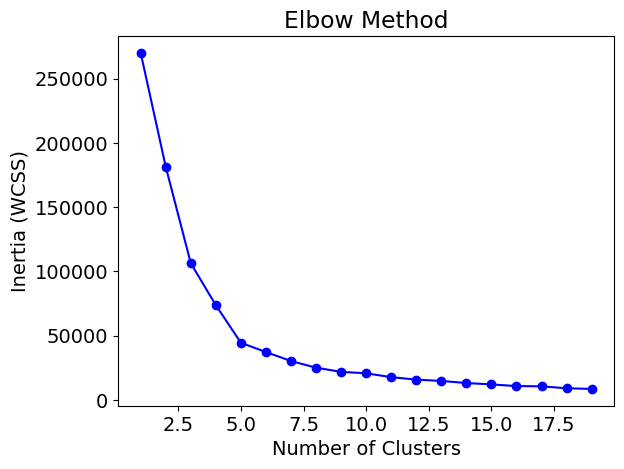

In [56]:
plt.plot(range(1, 20), inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method')
plt.show()

In [57]:
# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

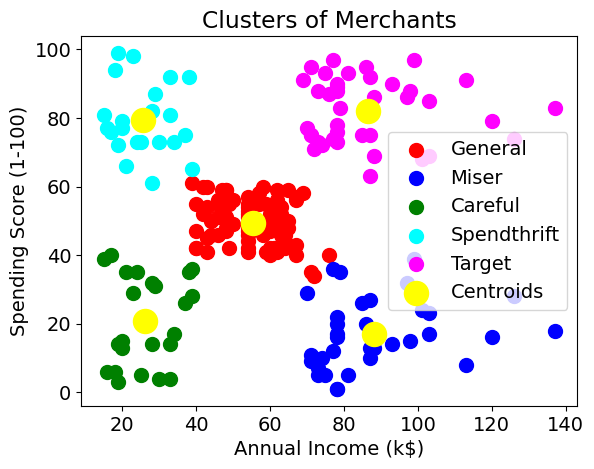

In [61]:
# Plot the clusters
plt.scatter(X[y_kmeans == 0]['Annual_Revenue'], X[y_kmeans == 0]['Spending_Score'], s=100, c='red', label='General')
plt.scatter(X[y_kmeans == 1]['Annual_Revenue'], X[y_kmeans == 1]['Spending_Score'], s=100, c='blue', label='Miser')
plt.scatter(X[y_kmeans == 2]['Annual_Revenue'], X[y_kmeans == 2]['Spending_Score'], s=100, c='green', label='Careful')
plt.scatter(X[y_kmeans == 3]['Annual_Revenue'], X[y_kmeans == 3]['Spending_Score'], s=100, c='cyan', label='Spendthrift')
plt.scatter(X[y_kmeans == 4]['Annual_Revenue'], X[y_kmeans == 4]['Spending_Score'], s=100, c='magenta', label='Target')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clusters of Merchants')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [67]:
df['Cluster_Number'] = y_kmeans

# Assign cluster nature to each merchant using NumPy vectorized indexing
df['Cluster_Nature'] = np.vectorize(cluster_nature_mapping.get)(y_kmeans)


In [68]:
df.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Repayment Score 1-5,Cluster_Nature,Cluster_Number
0,1,15,39,Mtwara,Mtindi 500ml,1,Careful,2
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2,Spendthrift,3
2,3,16,6,Mtwara,Mtindi 500ml,3,Careful,2
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4,Spendthrift,3
4,5,17,40,Mtwara,Mtindi 500ml,2,Careful,2


In [69]:
print(df['Cluster_Nature'].value_counts())


General        81
Target         39
Miser          35
Careful        23
Spendthrift    22
Name: Cluster_Nature, dtype: int64


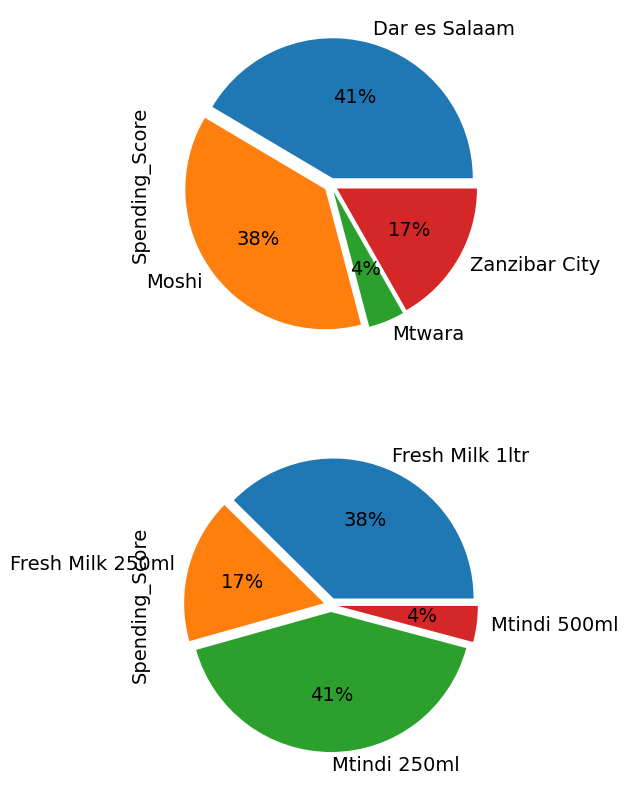

In [70]:
# Visualize spending score distribution by city and product
fig, axes = plt.subplots(2, 1, figsize=(12, 10))
df.groupby('City')['Spending_Score'].sum().plot(kind='pie', autopct='%1.0f%%', explode=(0.05, 0.05, 0.05, 0.05), ax=axes[0])
df.groupby('Most_Purchased_Product')['Spending_Score'].sum().plot(kind='pie', autopct='%1.0f%%', explode=(0.05, 0.05, 0.05, 0.05), ax=axes[1])
plt.show()

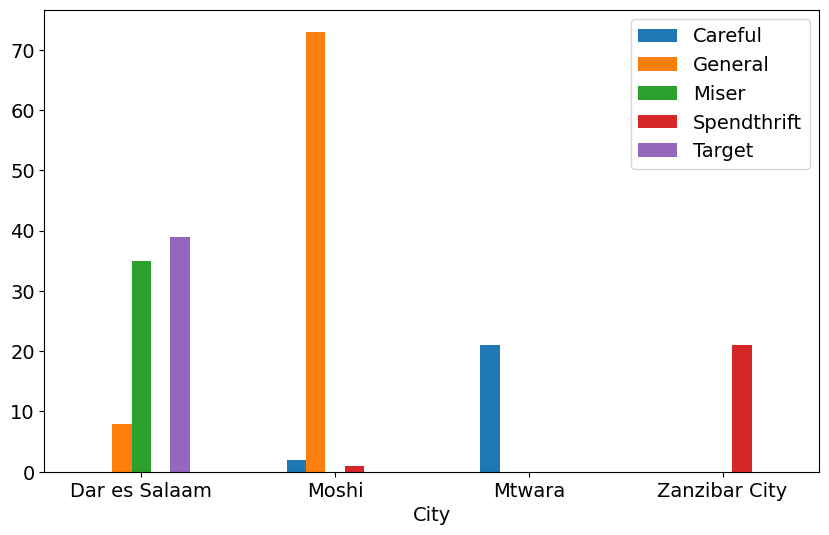

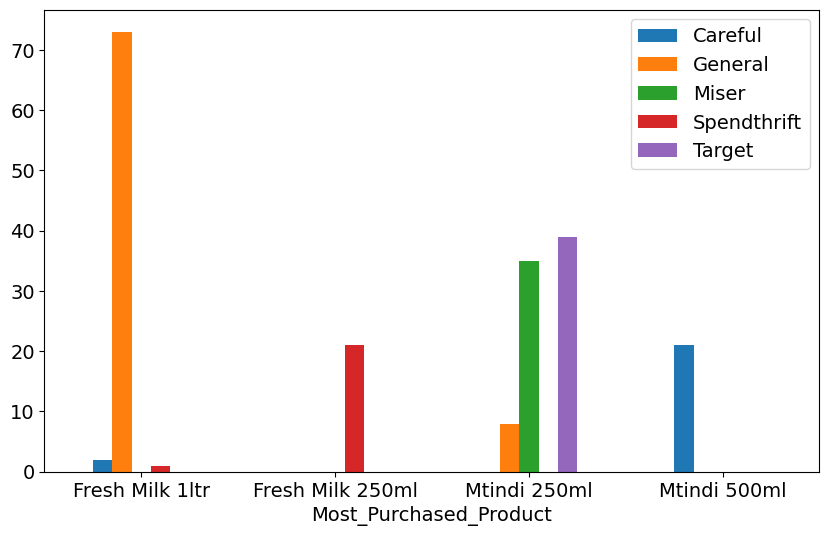

In [71]:
# Crosstabulations and bar plots
for feature in ['City', 'Most_Purchased_Product']:
    crosstab_result = pd.crosstab(index=df[feature], columns=df['Cluster_Nature'])
    crosstab_result.plot.bar(figsize=(10, 6), rot=0)
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.show()


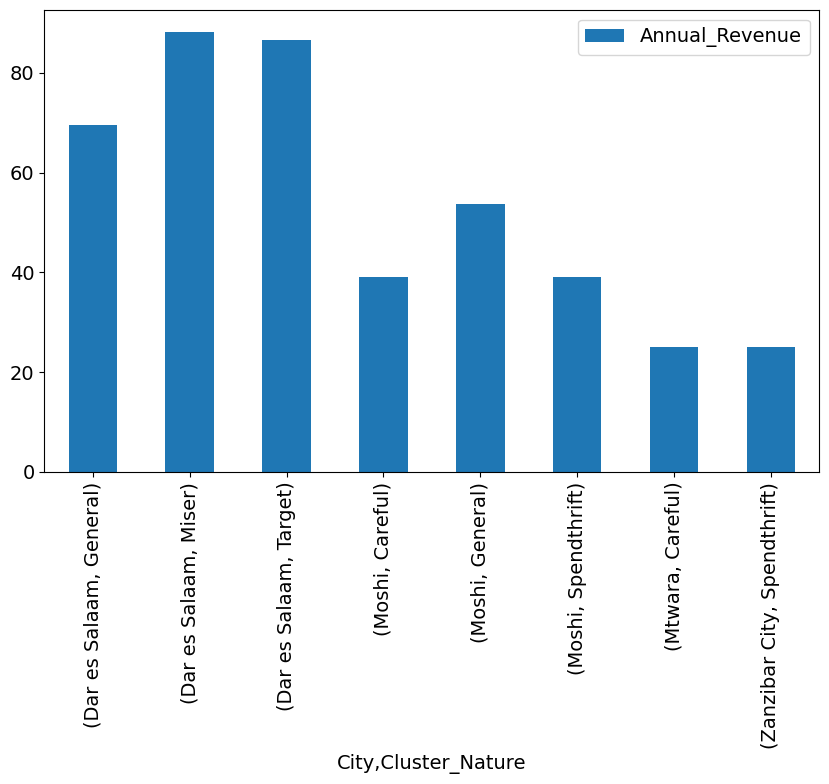

In [72]:
# Pivot table on city vs Cluster Nature aggregated by Annual Revenue
table = pd.pivot_table(df, index=['City', 'Cluster_Nature'], aggfunc={'Annual_Revenue': np.mean})
table.plot(kind='bar', figsize=(10, 6))
plt.show()


In [73]:
df_encoded = pd.get_dummies(df, columns=['City', 'Most_Purchased_Product', 'Cluster_Nature'])
X = df_encoded.drop(['Merchant Id', 'Repayment Score 1-5'], axis=1)
y = df_encoded['Repayment Score 1-5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [74]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [75]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}


In [76]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [77]:
best_rf = grid_search.best_estimator_

In [79]:
# Make predictions on the test set
y_pred = best_rf.predict(X_test_scaled)


In [80]:
accuracy = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", accuracy)

Random Forest Classifier Accuracy: 0.725


In [81]:
# Feature importance analysis
feature_importances = best_rf.feature_importances_

In [83]:
df.to_csv('analyzed.csv', index=False)

In [84]:
df.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Repayment Score 1-5,Cluster_Nature,Cluster_Number
0,1,15,39,Mtwara,Mtindi 500ml,1,Careful,2
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2,Spendthrift,3
2,3,16,6,Mtwara,Mtindi 500ml,3,Careful,2
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4,Spendthrift,3
4,5,17,40,Mtwara,Mtindi 500ml,2,Careful,2


In [88]:
# Swap values between 'Cluster_Nature' and 'Cluster_Number'
df['Cluster_Nature'], df['Cluster_Number'] = df['Cluster_Number'], df['Cluster_Nature']


In [89]:
df.head()

,Merchant Id,Annual_Revenue,Spending_Score,City,Most_Purchased_Product,Repayment Score 1-5,Cluster_Nature,Cluster_Number
0,1,15,39,Mtwara,Mtindi 500ml,1,2,Careful
1,2,15,81,Zanzibar City,Fresh Milk 250ml,2,3,Spendthrift
2,3,16,6,Mtwara,Mtindi 500ml,3,2,Careful
3,4,16,77,Zanzibar City,Fresh Milk 250ml,4,3,Spendthrift
4,5,17,40,Mtwara,Mtindi 500ml,2,2,Careful


In [90]:
df.to_csv('analyzed.csv', index=False)